In this workbook, we will investigate the properties of the action selection schemes and compare their properties: 
1. Greedy action selection
2. Epislon Greedy action selection
3. softmax action selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [2]:
class Bandit:
    """
    n-armed bandit.
    """
    def __init__(self, nb_actions, mean=0.0, std_Q=1.0, std_r=1.0):
        """
        :param nb_actions: number of arms.
        :param mean: mean of the normal distribution for $Q^*$.
        :param std_Q: standard deviation of the normal distribution for $Q^*$.
        :param std_r: standard deviation of the normal distribution for the sampled rewards.
        """
        # Store parameters
        self.nb_actions = nb_actions
        self.mean = mean
        self.std_Q = std_Q
        self.std_r = std_r
        
        # Initialize the true Q-values
        self.Q_star = rng.normal(self.mean, self.std_Q, self.nb_actions)
        
        # Optimal action
        self.a_star = self.Q_star.argmax()
        
    def step(self, action):
        """
        Sampled a single reward from the bandit.
        
        :param action: the selected action.
        :return: a reward.
        """
        return float(rng.normal(self.Q_star[action], self.std_r, 1))

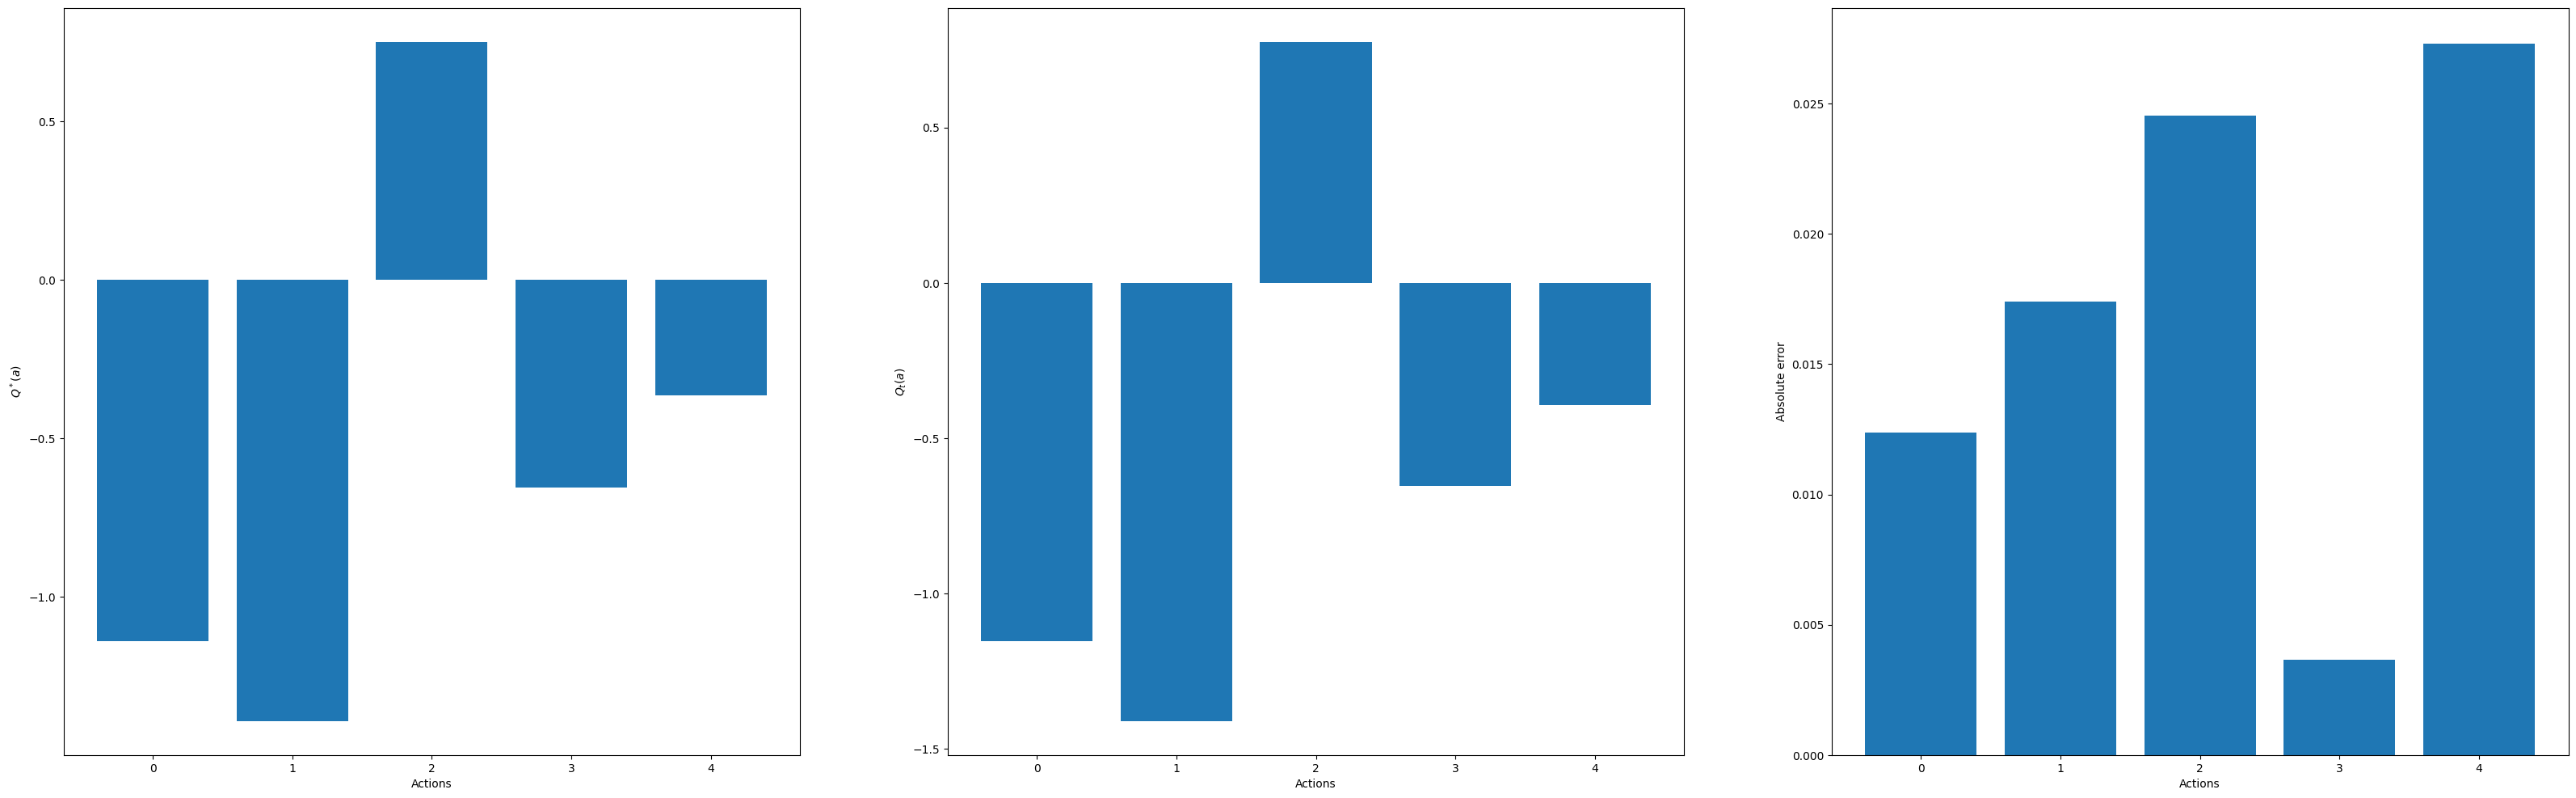

In [4]:
nb_actions = 5
bandit = Bandit(nb_actions)

all_rewards = []
for t in range(2000):
    rewards = []
    for a in range(nb_actions):
        rewards.append(bandit.step(a))
    all_rewards.append(rewards)
    
mean_reward = np.mean(all_rewards, axis=0)

plt.figure(figsize=(40, 12))
plt.subplot(131)
plt.bar(range(nb_actions), bandit.Q_star)
plt.xlabel("Actions")
plt.ylabel("$Q^*(a)$")
plt.subplot(132)
plt.bar(range(nb_actions), mean_reward)
plt.xlabel("Actions")
plt.ylabel("$Q_t(a)$")
plt.subplot(133)
plt.bar(range(nb_actions), np.abs(bandit.Q_star - mean_reward))
plt.xlabel("Actions")
plt.ylabel("Absolute error")
plt.show()

Implement the greedy algorithm on the 5-armed bandit.

Your algorithm will look like this:

Create a 5-armed bandit (mean of zero, variance of 1).
Initialize the estimated Q-values to 0 with an array of the same size as the bandit.
for 1000 plays:
Select the greedy action using the current estimates. Update the estimated Q-value of the action taken.
Additionally, you will store the received rewards at each step in an initially empty list or a numpy array of the correct size and plot it in the end. You will also plot the true Q-values and the estimated Q-values at the end of the 1000 plays.

Tip: to implement the argmax, do not rely on np.argmax(). If there are ties in the array, for example at the beginning:

In [6]:
x = np.array([0, 0, 0, 0, 0])
a = rng.choice(np.where(x == x.max())[0])

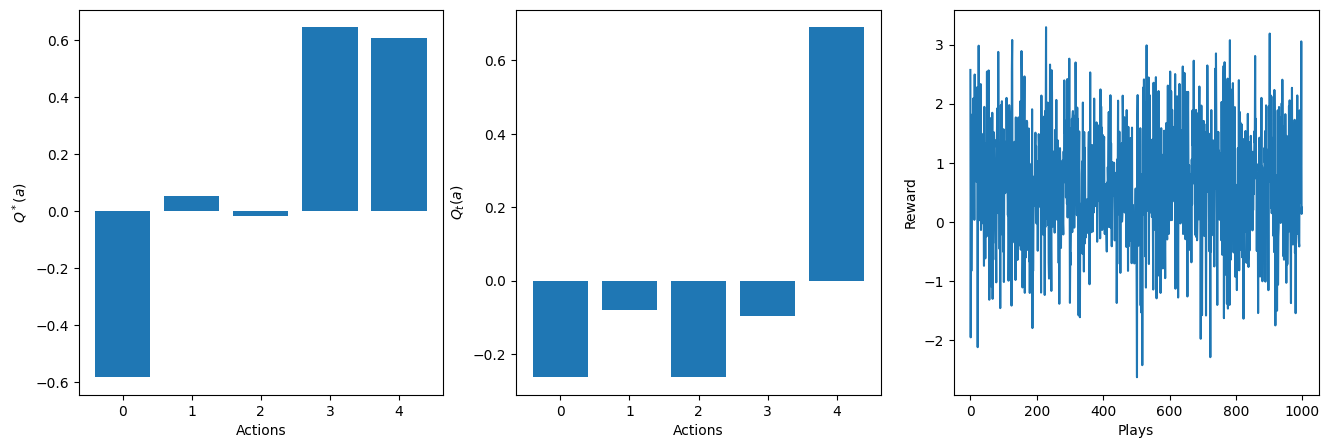

In [7]:
# Learning rate
alpha = 0.1

# Bandit
bandit = Bandit(nb_actions)

# Estimates
Q_t = np.zeros(nb_actions)

# Store the rewards after each step
rewards = []

# For 1000 plays
for step in range(1000):
    
    # Select the action greedily w.r.t Q_t
    action = rng.choice(np.where(Q_t == Q_t.max())[0])
    
    # Sample the reward
    reward = bandit.step(action)
    
    # Store the received reward
    rewards.append(reward)
    
    # Update the Q-value estimate of the action
    Q_t[action] += alpha * (reward - Q_t[action])
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.bar(range(nb_actions), bandit.Q_star)
plt.xlabel("Actions")
plt.ylabel("$Q^*(a)$")
plt.subplot(132)
plt.bar(range(nb_actions), Q_t)
plt.xlabel("Actions")
plt.ylabel("$Q_t(a)$")
plt.subplot(133)
plt.plot(rewards)
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.show()

Create a GreedyAgent class taking the bandit as an argument as well as the learning rate alpha=0.1

In [10]:
class GreedyAgent:
    
    def __init__(self, bandit, alpha):
        
        self.bandit = bandit
        self.alpha = alpha
        
        # Estimated Q-values
        self.Q_t = np.zeros(self.bandit.nb_actions)
        
    def act(self):
        
        action = rng.choice(np.where(self.Q_t == self.Q_t.max())[0])
        return action
        
    def update(self, action, reward):
        
        self.Q_t[action] += self.alpha * (reward - self.Q_t[action])
    
        
    def train(self, nb_steps):
        
        rewards = []

        for step in range(nb_steps):

            # Select the action 
            action = self.act()

            # Sample the reward
            reward = self.bandit.step(action)

            # Store the received reward
            rewards.append(reward)

            # Update the Q-value estimate of the action
            self.update(action, reward)
            
        return np.array(rewards)

In [11]:
bandit = Bandit(nb_actions)

agent = GreedyAgent(bandit, alpha=0.1)

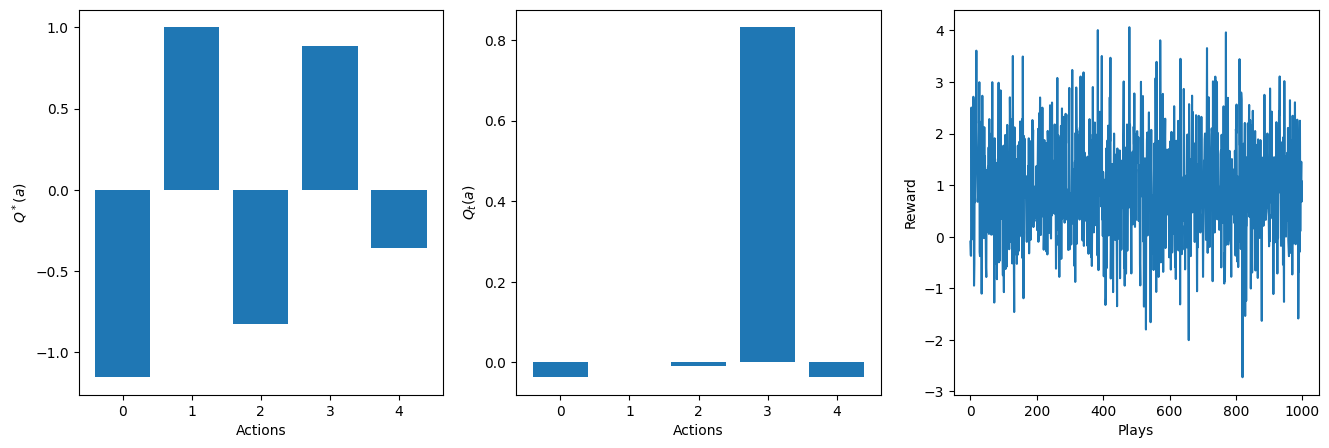

In [12]:
# Learning rate
alpha = 0.1

# Bandit
bandit = Bandit(nb_actions)

# Estimates
agent = GreedyAgent(bandit, alpha)

# Train for 1000 plays
rewards = agent.train(1000)
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(16, 5))
plt.subplot(131)
plt.bar(range(nb_actions), bandit.Q_star)
plt.xlabel("Actions")
plt.ylabel("$Q^*(a)$")
plt.subplot(132)
plt.bar(range(nb_actions), agent.Q_t)
plt.xlabel("Actions")
plt.ylabel("$Q_t(a)$")
plt.subplot(133)
plt.plot(rewards)
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.show()

Using bandit.a_star modify the train() method so that it also returns a list of binary values (0 and 1) indicating for each play whether the agent chose the optimal action. Plot this list and observe the lack of exploration.

In [13]:
class GreedyAgent:
    def __init__(self, bandit, alpha):
        
        self.bandit = bandit
        self.alpha = alpha
        
        # Estimated Q-values
        self.Q_t = np.zeros(self.bandit.nb_actions)
        
    def act(self):
        
        action = rng.choice(np.where(self.Q_t == self.Q_t.max())[0])
        return action
        
    def update(self, action, reward):
        
        self.Q_t[action] += self.alpha * (reward - self.Q_t[action])
        
    def train(self, nb_steps):
        
        rewards = []
        optimal = []

        for step in range(1000):

            # Select the action 
            action = self.act()

            # Sample the reward
            reward = self.bandit.step(action)

            # Store the received reward
            rewards.append(reward)
            
            # Optimal action
            if action == self.bandit.a_star:
                optimal.append(1.0)
            else:
                optimal.append(0.0)

            # Update the Q-value estimate of the action
            self.update(action, reward)
            
        return np.array(rewards), np.array(optimal)

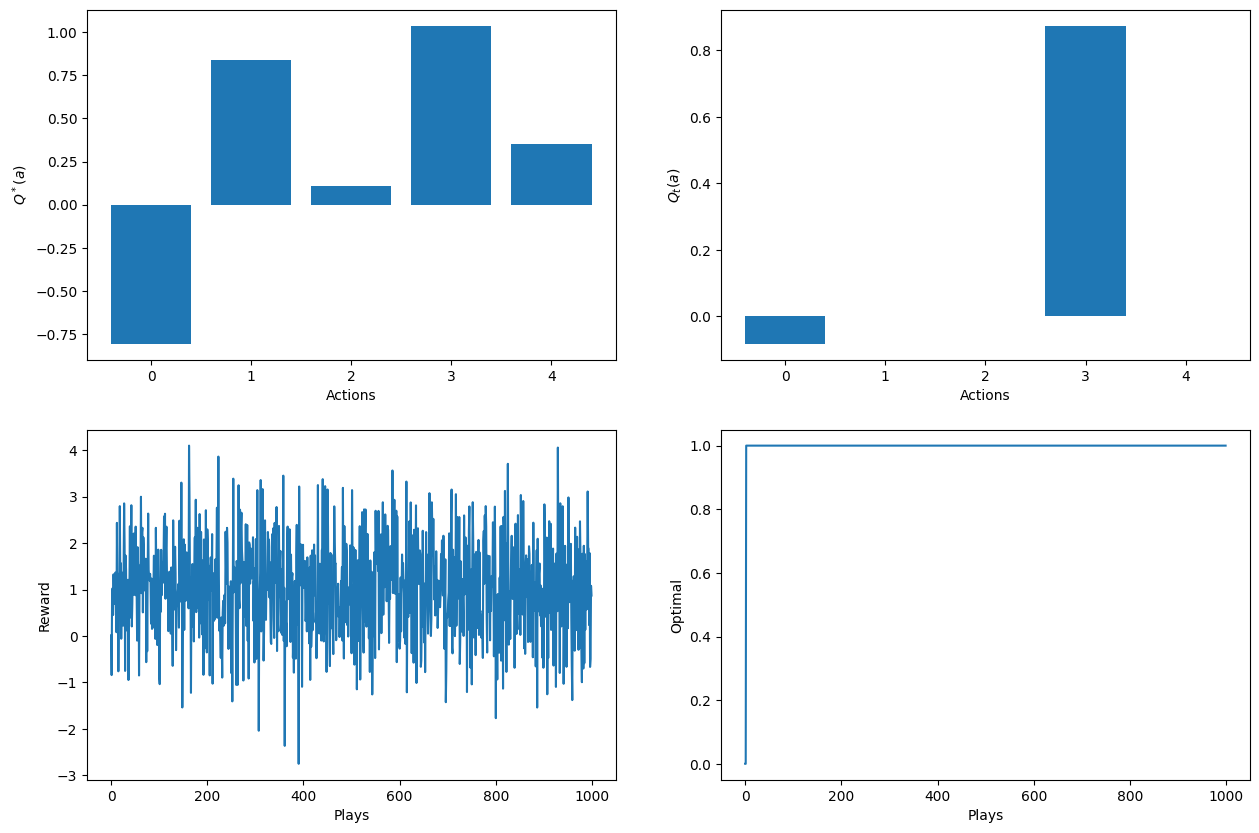

In [14]:
# Learning rate
alpha = 0.1

# Bandit
bandit = Bandit(nb_actions)

# Estimates
agent = GreedyAgent(bandit, alpha)

# Store the rewards after each step
rewards, optimal = agent.train(1000)
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.bar(range(nb_actions), bandit.Q_star)
plt.xlabel("Actions")
plt.ylabel("$Q^*(a)$")
plt.subplot(222)
plt.bar(range(nb_actions), agent.Q_t)
plt.xlabel("Actions")
plt.ylabel("$Q_t(a)$")
plt.subplot(223)
plt.plot(rewards)
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(224)
plt.plot(optimal)
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()

Run the learning procedure 200 times (new bandit and agent every time) and average the results. Give a unique name to these arrays (e.g. rewards_greedy and optimal_greedy) as we will do comparisons later. Compare the results with the lecture, where a 10-armed bandit was used.

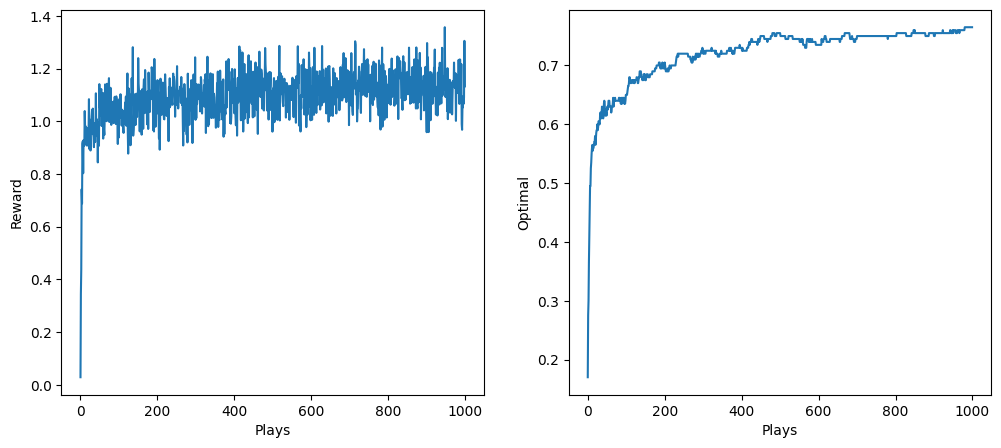

In [15]:
# Number of arms
nb_actions = 5

# Learning rate
alpha = 0.1

rewards_greedy = []
optimal_greedy = []

for trial in range(200):

    # Bandit
    bandit = Bandit(nb_actions)

    # Estimates
    agent = GreedyAgent(bandit, alpha)

    # Store the rewards after each step
    rewards, optimal = agent.train(1000)
    
    rewards_greedy.append(rewards)
    optimal_greedy.append(optimal)
    
rewards_greedy = np.mean(rewards_greedy, axis=0)
optimal_greedy = np.mean(optimal_greedy, axis=0)
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards_greedy)
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(122)
plt.plot(optimal_greedy)
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()

We observe that the greedy agent selects the optimal action around 80% of the time, vs. 50% for the 10-armed bandits. It is really not bad knowing that it starts at chance level (20% for 5 actions).

Epsilon Greedy Agent

In [17]:
class EpsilonGreedyAgent(GreedyAgent):
    
    def __init__(self, bandit, alpha, epsilon):
        
        self.epsilon = epsilon
        
        # List of actions
        self.actions = np.arange(bandit.nb_actions)
        
        # Call the constructor of GreedyAgent
        super().__init__(bandit, alpha)
        
    def act(self):
        
        action = rng.choice(np.where(self.Q_t == self.Q_t.max())[0])
        
        if rng.random() < self.epsilon:
            action = rng.choice(self.actions[self.actions != action])
            
        return action

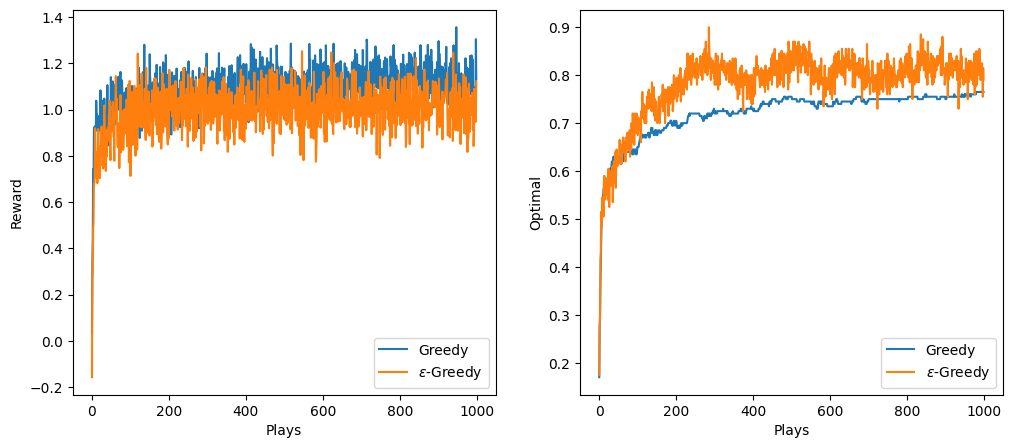

In [18]:
# Number of arms
nb_actions = 5

# Learning rate
alpha = 0.1

# Epsilon for exploration
epsilon = 0.1

rewards_egreedy = []
optimal_egreedy = []

for trial in range(200):

    # Bandit
    bandit = Bandit(nb_actions)

    # Estimates
    agent = EpsilonGreedyAgent(bandit, alpha, epsilon)

    # Store the rewards after each step
    rewards, optimal = agent.train(1000)
    
    rewards_egreedy.append(rewards)
    optimal_egreedy.append(optimal)
    
rewards_egreedy = np.mean(rewards_egreedy, axis=0)
optimal_egreedy = np.mean(optimal_egreedy, axis=0)
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_egreedy, label="$\epsilon$-Greedy")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(122)
plt.plot(optimal_greedy, label="Greedy")
plt.plot(optimal_egreedy, label="$\epsilon$-Greedy")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()

Softmax action selection

In [19]:
class SoftmaxAgent(GreedyAgent):
    
    def __init__(self, bandit, alpha, tau):
        self.tau = tau
        
        # List of actions
        self.actions = np.arange(bandit.nb_actions)
        
        # Call the constructor of GreedyAgent
        super().__init__(bandit, alpha)
        
    def act(self):
        
        logit = np.exp((self.Q_t - self.Q_t.max())/self.tau)
        
        proba_softmax = logit / np.sum(logit)
        
        action = rng.choice(self.actions, p=proba_softmax) 
            
        return action

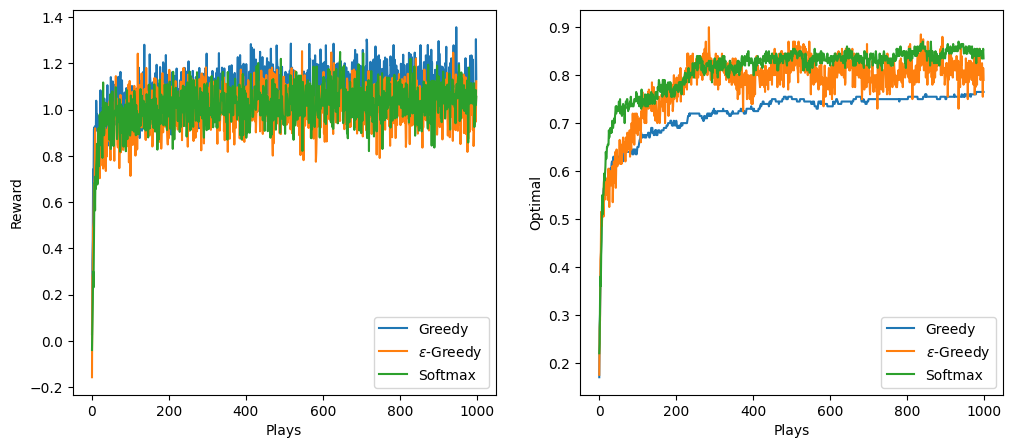

In [20]:
# Number of arms
nb_actions = 5

# Learning rate
alpha = 0.1

# Tau for exploration
tau = 0.1

rewards_softmax = []
optimal_softmax = []

for trial in range(200):

    # Bandit
    bandit = Bandit(nb_actions)

    # Estimates
    agent = SoftmaxAgent(bandit, alpha, tau)

    # Store the rewards after each step
    rewards, optimal = agent.train(1000)
    
    rewards_softmax.append(rewards)
    optimal_softmax.append(optimal)
    
rewards_softmax = np.mean(rewards_softmax, axis=0)
optimal_softmax = np.mean(optimal_softmax, axis=0)
    
# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_egreedy, label="$\epsilon$-Greedy")
plt.plot(rewards_softmax, label="Softmax")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(122)
plt.plot(optimal_greedy, label="Greedy")
plt.plot(optimal_egreedy, label="$\epsilon$-Greedy")
plt.plot(optimal_softmax, label="Softmax")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()